## Импорт библиотек

In [20]:
import numpy as np # стандартная библиотека в Python для работы с n-мерными массивами
import pandas as pd # библиотека для работы с данными разных форматов (например CSV, SQL)
import pickle # библиотека для преобразования объектов в поток байтов (используется для сохранения/загрузки моделей)
import matplotlib.pyplot as plt # стандарный модуль для языка Python, использующийся при построении графиков/диаграмм

In [4]:
# scikit-learn - одна из наиболее используемых библиотек для машинного обучения. Реализует многие алгоритмы машинного
# обучения и предоставляет инструменты для работы с данными  
from sklearn.model_selection import train_test_split # модуль для создания обучающих и тестовых выборок
from sklearn.preprocessing import StandardScaler # модуль для обработки данных перед применением методов ML
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.utils import shuffle # вспомогательный модуль, использующийся для работы с данными
from sklearn.ensemble import RandomForestClassifier # модуль для работы с ансамблевыми методами

## 1. Основная информация о данных

In [21]:
# Загрузка датасета из локальных файлов
data = pd.read_csv(r"D:\for ML\HW-hack\train_hw.csv", sep=';') # перед путём к файлу указан 'r', чтобы избежать
                                                               # экранировани символов. Например, для корректной работы с паками
                                                               # или файлами, имена которых начинаются с 'n'. Без использования
                                                               # символа 'r', конструкция "\n" будет трактоваться как новая строка.
                                                               # Вместо 'r' можно использовать двойное '\\' в записи пути вместо '\'

In [3]:
# Вывод первых 5-ти (по умолчанию) элементов датафрейма. Проверяем, те ли данные были загружены
data.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [4]:
# Вывод названия всех столбцов датафрейма. В текущем датафрейме все столбцы не отображаются при методе ".head()"
data.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [5]:
# Вывод описания (статистики) по выбранному столцу
data['FORMATION'].describe()
# Получаем информацию (статистику) по непустым (не типа 'nan') элементам: общее кол-во, число уникальных, самое распространённое,
# кол-во самого распространённого элемента, название столбца и тип содержащихся данных

count        1033517
unique            69
top       Utsira Fm.
freq          172636
Name: FORMATION, dtype: object

In [6]:
data['GROUP'].describe()

count           1169233
unique               14
top       HORDALAND GP.
freq             293155
Name: GROUP, dtype: object

In [7]:
data['WELL'].describe()

count     1170511
unique         98
top        25/2-7
freq        25131
Name: WELL, dtype: object

In [6]:
wells = data['WELL'].unique() # запись в переменную всех уникальных значений, содержащихся в столбце
wells # вывод значения переменной

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16', '16/2-6', '16/4-1', '16/5-3', '16/7-4', '16/7-5',
       '16/8-1', '17/11-1', '25/11-15', '25/11-19 S', '25/11-5',
       '25/2-13 T4', '25/2-14', '25/2-7', '25/3-1', '25/4-5', '25/5-1',
       '25/5-4', '25/6-1', '25/6-2', '25/6-3', '25/7-2', '25/8-5 S',
       '25/8-7', '25/9-1', '26/4-1', '29/6-1', '30/3-3', '30/3-5 S',
       '30/6-5', '31/2-1', '31/2-19 S', '31/2-7', '31/2-8', '31/2-9',
       '31/3-1', '31/3-2', '31/3-3', '31/3-4', '31/4-10', '31/4-5',
       '31/5-4 S', '31/6-5', '31/6-8', '32/2-1', '33/5-2', '33/6-3 S',
       '33/9-1', '33/9-17', '34/10-19', '34/10-21', '34/10-33',
       '34/10-35', '34/11-1', '34/11-2 S', '34/12-1', '34/2-4',
       '34/3-1 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/7-13',
       '34/7-20', '34/7-21', '34/8-1', '34/8-3', '34/8-7 R', '35/11-1',
       '35/11-10', '35/11-11', '35/11-12

In [9]:
# Вывод кол-ва значений в переменной (в данном случае кол-ва уникальных скважин)
len(wells)

98

## 2. Exploratory Data Analysis

### 2.1 Анализ соотношения литологических типов

In [7]:
# Создание словаря с литологическими типами (для корреляции заначений с названиями литологических типов)
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [11]:
# Вывод всех уникальных значений столбца с литологическими типами
data['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique()

array([65000, 30000, 65030, 70000, 99000, 80000, 86000, 74000, 70032,
       90000, 88000, 93000], dtype=int64)

In [8]:
# Запись в переменную литологических типов из столбца датасета вместе с их кол-вом
counts = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()

In [13]:
counts
# Получаем аналог двумерного массива из NumPy. Далее узнаем тип переменной 'counts'

65000    720803
30000    168937
65030    150455
70000     56320
80000     33329
99000     15245
70032     10513
88000      8213
90000      3820
74000      1688
86000      1085
93000       103
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

In [14]:
# Вывод типа переменной 'counts'
type(counts)
# Переменная имеет специальный тип данных из библиотеки Pandas

pandas.core.series.Series

C:\Users\fedor\AppData\Local\Temp\ipykernel_14708\1360217529.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names, rotation=45)


Text(0, 0.5, 'Lithology presence (\\%)')

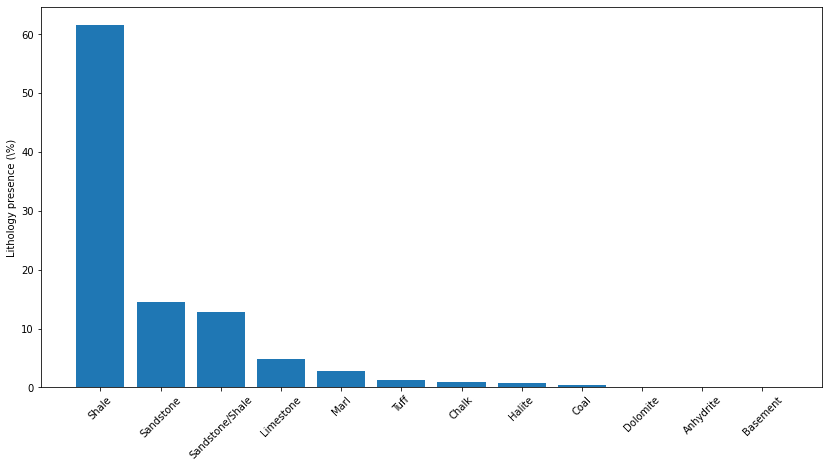

In [15]:
counts = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts() # лит. типы вместе с их кол-ом (объект типа 'Series' в Pandas)
names = [] # список, в который будут записываться названия лит. типов
percentage = [] # список, в который будут записываться процент для каждого из лит. типов
N = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].shape[0] # кол-во элементов по кол-ву строк (для расчёта %-го соотношения)
for item in counts.iteritems(): # перебираем строки 'counts'; объект 'item' явл. кортежем (неизменяемый список) с именем строки и значением, т.е. лит. типоми его кол-ом (на основе метода ".iteritems()", который возвращает именно этот тип данных)
    names.append(lithology_keys[item[0]]) # добавляем в список 'names' название текущего лит. типа на основе словаря 
    percentage.append(float(item[1])/N*100) # добавляем в список 'percentage' данные о процентном содержании текущего лит. типа относительного общего числа записей о лит. типах

# Визуализируем собранную информацию
fig, ax = plt.subplots(1, 1, figsize=(14, 7)) # создаём область (fig) и размещённый в ней холст (ax). Метод ".subplots()" возвращает два необходимых объекта
ax.bar(x=np.arange(len(names)), height=percentage) # создаём на холсте (ax) столбчатую диаграмму. Метод ".arange(len(names))" создаёт массив с равномерно разнесёнными значениями
# Добавляем подписи
ax.set_xticklabels(names, rotation=45)
ax.set_xticks(np.arange(len(names)))
ax.set_ylabel('Lithology presence (\%)')

In [16]:
#stratified key fold

### 2.2 Анализ отсутствующих значений

In [3]:
# Вывод информаци о наличии пропущенных значений для всех столбцов
data.isna().any() # метод ".isna()" проверяет наличие 'nan' значений в объекте, для которого его вызвали 
                  # (в данном случае для всего датафрейма) и возвращает объект, состоящий из переменных True/False. 
                  # Метод ".any()" проверяет по столбцам объекта является ли в них какой-либо элемент истинным (True или 0)

WELL                                 False
DEPTH_MD                             False
X_LOC                                 True
Y_LOC                                 True
Z_LOC                                 True
GROUP                                 True
FORMATION                             True
CALI                                  True
RSHA                                  True
RMED                                  True
RDEP                                  True
RHOB                                  True
GR                                   False
SGR                                   True
NPHI                                  True
PEF                                   True
DTC                                   True
SP                                    True
BS                                    True
ROP                                   True
DTS                                   True
DCAL                                  True
DRHO                                  True
MUDWEIGHT  

In [18]:
# Вывод кол-ва пропущенных элементов в каждом столбце
data.isna().sum()

WELL                                       0
DEPTH_MD                                   0
X_LOC                                  10775
Y_LOC                                  10775
Z_LOC                                  10775
GROUP                                   1278
FORMATION                             136994
CALI                                   87877
RSHA                                  539861
RMED                                   38993
RDEP                                   11015
RHOB                                  161269
GR                                         0
SGR                                  1101158
NPHI                                  405102
PEF                                   498819
DTC                                    80863
SP                                    306264
BS                                    487854
ROP                                   635440
DTS                                   995898
DCAL                                  871678
DRHO      

C:\Users\fedor\AppData\Local\Temp\ipykernel_14708\1631084686.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.columns[2:-2], rotation=45)


Text(0, 0.5, 'Well presence (\\%)')

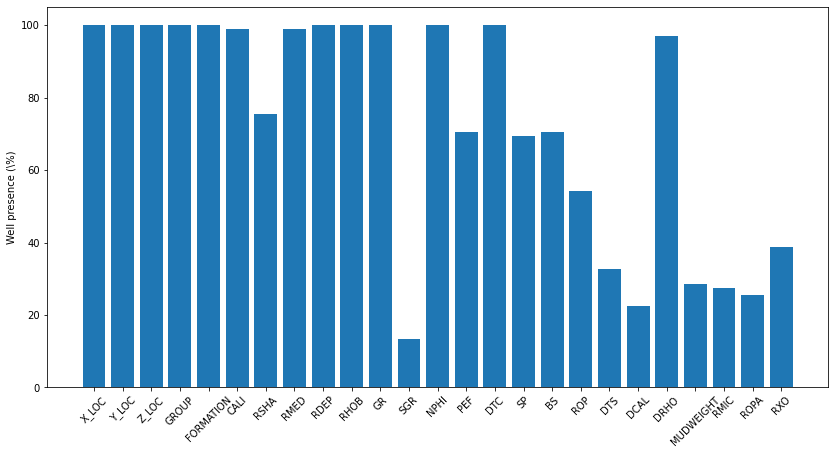

In [19]:
occurences = np.zeros(25) # массив NumPy из 25 элементов по кол-ву столбцов, для которых будем исследовать процентное соотношение nan значений 
for well in data['WELL'].unique(): # перебираем все уникальные значения в столбце
    occurences += data[data['WELL'] == well].isna().all().astype(int).values[2:-2] # "data['WELL'] == well" - возвращает объект Series, где значения датафрейма заменяются на bool
                                                                                   # "data[data['WELL'] == well]" - возвращает датафрейм со значениями для конкретной скважины
                                                                                   # ".isna().all()" - возвращает объект Series, где указано по столбцам какие из них полностью пустные
                                                                                   # ".astype(int).values[2:-2]" - преобразует весь объект к выбранному типу и возвращает объект типа NumPy, преобразуя в него датафрейм (в квадратных скобках записаны столбцы, которые нужно преобразовать от 2-го включительно до предпоследнего невключительно)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(occurences.shape[0]), height=(data.WELL.unique().shape[0]-occurences)/data.WELL.unique().shape[0]*100.0)
ax.set_xticklabels(data.columns[2:-2], rotation=45)
ax.set_xticks(np.arange(occurences.shape[0]))
ax.set_ylabel('Well presence (\%)')

### 2.3 Вид каратажных кривых

(3272.024, 494.528)

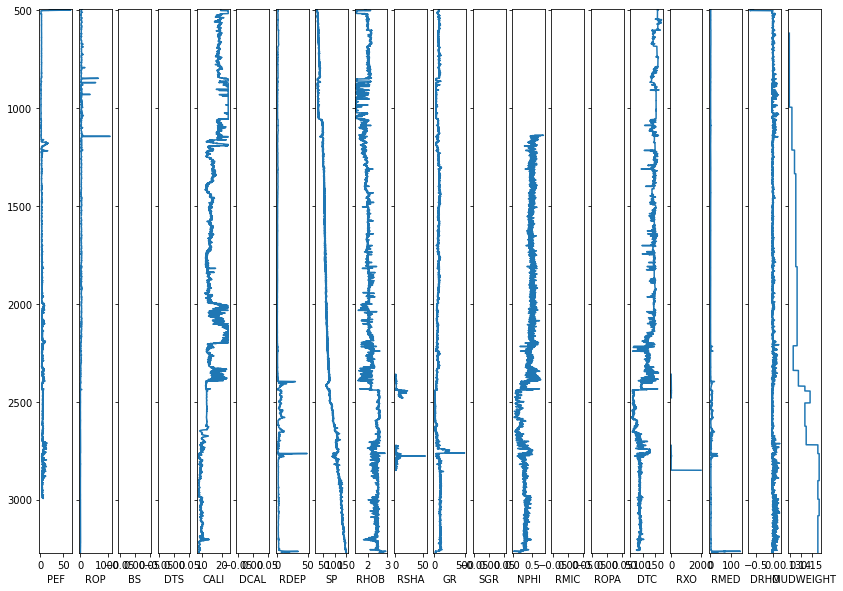

In [23]:
well_data = data[data['WELL'] == wells[0]] # запись в переменную части датафрейма с информацией только о 1-ой в списке 'well' скважине
fig, axs = plt.subplots(1, len(well_data.columns)-9, figsize=(14, 10), sharey=True) # параметр "sharey" делает ось Y общей для всех холстов "axes"
for ic, col in enumerate(set(well_data.columns)-set(['DEPTH_MD', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
                                                     'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL', 'GROUP', 'FORMATION',
                                                    'X_LOC', 'Y_LOC', 'Z_LOC'])): # enumerate() добавляет счётчик, превращая объект в кортеж.
                                                                                  # Например, for e in enumerate(elements). Здесь вместо elements будет кортеж (counter, element)
                                                                                  # По умолчанию отсчёт начинается с 0, но можно передать вторым параметром число, с которого будет начинаться отсчёт
                                                                                  # Метод ".set()" преобразует объект в множество {} (запись аналогична словарю). Множество похоже на список, только упорядочено и не содержит дубликатов
    axs[ic].plot(well_data[col], well_data['DEPTH_MD'])
    axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['DEPTH_MD'].values[-1], well_data['DEPTH_MD'].values[0]) # обрезаем ось Y для первого холста. Т.к. оси для всех холстов связаны, то изменяются они изменяются сразу для всех холстов

(4422.0172, 2484.1692)

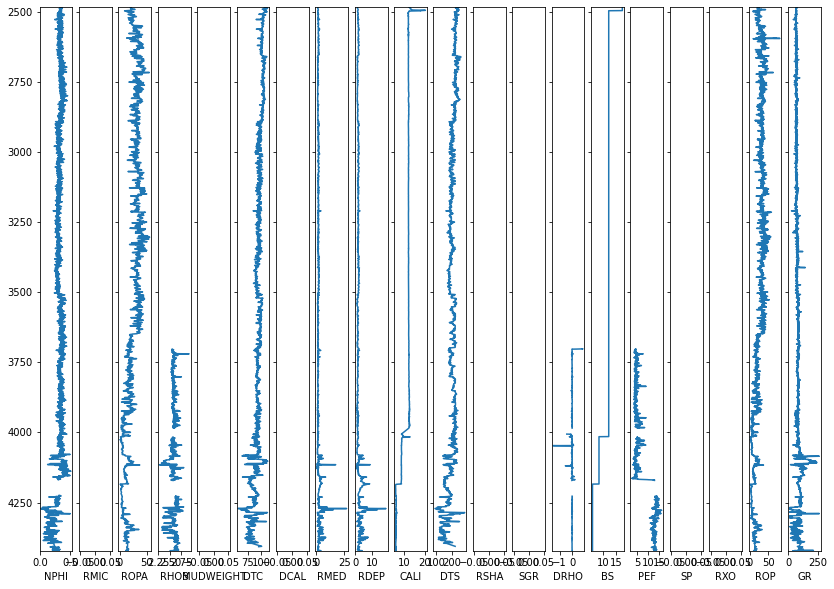

In [21]:
well_data = data[data['WELL'] == wells[57]]
fig, axs = plt.subplots(1, len(well_data.columns)-9, figsize=(14, 10), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['DEPTH_MD', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
                                                     'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL', 'GROUP', 'FORMATION',
                                                    'X_LOC', 'Y_LOC', 'Z_LOC'])):
    axs[ic].plot(well_data[col], well_data['DEPTH_MD'])
    axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['DEPTH_MD'].values[-1], well_data['DEPTH_MD'].values[0])

## 3. Работа с моделью

### 3.1 Подготовка данных для тренировки

In [10]:
# Удаление из датасета выбранных столбцов для создания датасета для обучения модели
X = data.drop(columns=['WELL', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE'])

In [11]:
# Замена всех отсутствующих значений в датасете на 0
X.fillna(0, inplace=True) # параметр "inplace" отвечает за непосредственное произведение замены внутри датасета

In [14]:
# Создание объекта (Series), содержащего набор целевых значений 
y = data['FORCE_2020_LITHOFACIES_LITHOLOGY']

In [15]:
# Создание словаря для литотипов (акая замена нужна для более эффективной работы алгоритма)
lithology_numbers = {30000: 0,
                 65030: 1,
                 65000: 2,
                 80000: 3,
                 74000: 4,
                 70000: 5,
                 70032: 6,
                 88000: 7,
                 86000: 8,
                 99000: 9,
                 90000: 10,
                 93000: 11}

In [26]:
# Замена данных из объекта Series при сопоставлении со словарём
y = y.map(lithology_numbers)

In [27]:
y

0          2
1          2
2          2
3          2
4          2
          ..
1170506    0
1170507    1
1170508    1
1170509    1
1170510    1
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, Length: 1170511, dtype: int64

In [28]:
# Возвращает массив NumPy размером [максимальное значение в исходном массиве + 1] и заполняет его количеством включений
# в исходном массиве значений, соответствующих текущему индексу элемента в новом массиве
np.bincount(y) # https://i.stack.imgur.com/yAwym.png

array([168937, 150455, 720803,  33329,   1688,  56320,  10513,   8213,
         1085,  15245,   3820,    103], dtype=int64)

In [29]:
# Перетасовываем данные для двух объектов по одинаковому закону, т.е. с сохранением относительности между элементами из разных объектов
X, y = shuffle(X, y, random_state=42) # параметр "random_state" отвечает за определение способа перетасовки данных
                                      # При присваивании ему конкретного значения фиксуруем способ перетасовки

In [17]:
X

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
0,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,0,19.480835,0.0,1.611410,1.798681,...,24.612379,0.0,34.636410,0.0,0.0,-0.574928,0.0,0.0,0.000000,0.0
1,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,0,19.468800,0.0,1.618070,1.795641,...,23.895531,0.0,34.636410,0.0,0.0,-0.570188,0.0,0.0,0.000000,0.0
2,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,0,19.468800,0.0,1.626459,1.800733,...,23.916357,0.0,34.779556,0.0,0.0,-0.574245,0.0,0.0,0.000000,0.0
3,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,0,19.459282,0.0,1.621594,1.801517,...,23.793688,0.0,39.965164,0.0,0.0,-0.586315,0.0,0.0,0.000000,0.0
4,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,0,19.453100,0.0,1.602679,1.795299,...,24.104078,0.0,57.483765,0.0,0.0,-0.597914,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,3169.3124,0.00000,0.0,0.000000,VESTLAND GP.,Bryne Fm.,8.423170,0.0,0.000000,0.000000,...,0.000000,8.5,27.674368,0.0,0.0,-0.001763,0.0,0.0,26.673708,0.0
1170507,3169.4644,0.00000,0.0,0.000000,VESTLAND GP.,Bryne Fm.,8.379244,0.0,0.000000,0.000000,...,0.000000,8.5,28.024338,0.0,0.0,-0.007600,0.0,0.0,26.840818,0.0
1170508,3169.6164,0.00000,0.0,0.000000,VESTLAND GP.,Bryne Fm.,8.350248,0.0,0.000000,0.000000,...,0.000000,8.5,28.091282,0.0,0.0,-0.018297,0.0,0.0,27.007942,0.0
1170509,3169.7684,0.00000,0.0,0.000000,VESTLAND GP.,Bryne Fm.,8.313779,0.0,0.000000,0.000000,...,0.000000,8.5,28.019775,0.0,0.0,-0.011438,0.0,0.0,27.175179,0.0


In [31]:
# Вывод названия всех столбцов в датафрейме
X.columns

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION', 'CALI',
       'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF', 'DTC', 'SP',
       'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO'],
      dtype='object')

In [32]:
# Переопределяем датасет "X", сохраняя определённые столбцы
X = X[['DEPTH_MD', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS']]

In [33]:
# Перед моделированием небходимо масштабировать данные, которые изначально содержат признаки разного диапазона (масштаба) или
# представлены в разных единицах измерения.Идея заключается в том, что переменные, которые измеряются в разных масштабах, 
# не влияют в равной степени на соответствие модели и обучающую функцию модели и могут в конечном итоге создать систематическую ошибку.
# Для масштабирования будет использован метод стандартизации, который удаляет среднее значение и масштабирует данные до единичной дисперсии.
scaler = StandardScaler() # создание объекта функции

In [34]:
X.columns

Index(['DEPTH_MD', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS'],
      dtype='object')

In [35]:
# Применяем функцию масштабирования по методу стандартизации
X = scaler.fit_transform(X)

In [36]:
# Разбиваем данные на датасеты для обучения модели (тренировки) и для тестирования качества модели
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # параметр "test_size" отвечает за 
                                                                                          # величину тестовой выборки в проценте
                                                                                          # от исходных данных (здесь 20 %)

### 3.2 Способ оценки точности модели

In [38]:
# Определение матрицы для функции оценки точности модели (функция предоставлена организаторами)
A=np.array([[0.   , 2.   , 3.5  , 3.   , 3.75 , 3.5  , 3.5  , 4.   , 4.   ,
        2.5  , 3.875, 3.25 ],
       [2.   , 0.   , 2.375, 2.75 , 4.   , 3.75 , 3.75 , 3.875, 4.   ,
        3.   , 3.75 , 3.   ],
       [3.5  , 2.375, 0.   , 2.   , 3.5  , 3.5  , 3.75 , 4.   , 4.   ,
        2.75 , 3.25 , 3.   ],
       [3.   , 2.75 , 2.   , 0.   , 2.5  , 2.   , 2.25 , 4.   , 4.   ,
        3.375, 3.75 , 3.25 ],
       [3.75 , 4.   , 3.5  , 2.5  , 0.   , 2.625, 2.875, 3.75 , 3.25 ,
        3.   , 4.   , 3.625],
       [3.5  , 3.75 , 3.5  , 2.   , 2.625, 0.   , 1.375, 4.   , 3.75 ,
        3.5  , 4.   , 3.625],
       [3.5  , 3.75 , 3.75 , 2.25 , 2.875, 1.375, 0.   , 4.   , 3.75 ,
        3.125, 4.   , 3.75 ],
       [4.   , 3.875, 4.   , 4.   , 3.75 , 4.   , 4.   , 0.   , 2.75 ,
        3.75 , 3.75 , 4.   ],
       [4.   , 4.   , 4.   , 4.   , 3.25 , 3.75 , 3.75 , 2.75 , 0.   ,
        4.   , 4.   , 3.875],
       [2.5  , 3.   , 2.75 , 3.375, 3.   , 3.5  , 3.125, 3.75 , 4.   ,
        0.   , 2.5  , 3.25 ],
       [3.875, 3.75 , 3.25 , 3.75 , 4.   , 4.   , 4.   , 3.75 , 4.   ,
        2.5  , 0.   , 4.   ],
       [3.25 , 3.   , 3.   , 3.25 , 3.625, 3.625, 3.75 , 4.   , 3.875,
        3.25 , 4.   , 0.   ]])

In [39]:
A

array([[0.   , 2.   , 3.5  , 3.   , 3.75 , 3.5  , 3.5  , 4.   , 4.   ,
        2.5  , 3.875, 3.25 ],
       [2.   , 0.   , 2.375, 2.75 , 4.   , 3.75 , 3.75 , 3.875, 4.   ,
        3.   , 3.75 , 3.   ],
       [3.5  , 2.375, 0.   , 2.   , 3.5  , 3.5  , 3.75 , 4.   , 4.   ,
        2.75 , 3.25 , 3.   ],
       [3.   , 2.75 , 2.   , 0.   , 2.5  , 2.   , 2.25 , 4.   , 4.   ,
        3.375, 3.75 , 3.25 ],
       [3.75 , 4.   , 3.5  , 2.5  , 0.   , 2.625, 2.875, 3.75 , 3.25 ,
        3.   , 4.   , 3.625],
       [3.5  , 3.75 , 3.5  , 2.   , 2.625, 0.   , 1.375, 4.   , 3.75 ,
        3.5  , 4.   , 3.625],
       [3.5  , 3.75 , 3.75 , 2.25 , 2.875, 1.375, 0.   , 4.   , 3.75 ,
        3.125, 4.   , 3.75 ],
       [4.   , 3.875, 4.   , 4.   , 3.75 , 4.   , 4.   , 0.   , 2.75 ,
        3.75 , 3.75 , 4.   ],
       [4.   , 4.   , 4.   , 4.   , 3.25 , 3.75 , 3.75 , 2.75 , 0.   ,
        4.   , 4.   , 3.875],
       [2.5  , 3.   , 2.75 , 3.375, 3.   , 3.5  , 3.125, 3.75 , 4.   ,
        0.   , 2.5  

In [40]:
# Определение функции оценки точности модели
def score(y_true, y_pred):
    S = 0.0
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    for i in range(0, y_true.shape[0]):
        S -= A[y_true[i], y_pred[i]]
    return S/y_true.shape[0]

### 3.3 Применение модели

In [44]:
# Создание модели с опредлением её гиперпараметров. Применяется модель "Random Forest", которая относиться к классу Ансамблевых
# методов ML. В основе её работы лежит принцип бустинга на деревьях
model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced') # "n_estimators" - кол-во деревьев
                                                                                          # "class_weight" - позволяет указать на важность классов данных
                                                                                          # 'balanced' означает, что чем меньше класс, тем большего его образцов нужно использовать модели

In [45]:
# Обучение модели на тренировочныч данных
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=50,
                       random_state=42)

### 3.4 Тестирование модели

In [46]:
# Создание набора данных
y_pred_test = model.predict(X_test)

In [47]:
# Оценка различия результатов предсказания модели по тренировочным и тестовым данным
score(y_test.values, y_pred_test)

-0.13149553828870197

### 3.5 Локальное сохранение модели

In [ ]:
# Вызывается функция записи в файл объекта "model"
pickle.dump(model, open('model.pkl', 'wb')) # функция "open()" вызвана с параметром 'wb', который означает, что
                                            # 1. файл открыт для записи
                                            # 2. файл настроен на работу с двоичными символами (pickle преобразует объеты в байты)

In [ ]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))